In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.shape

(8341, 21)

In [ ]:
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,...,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,...,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,...,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,...,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,...,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8341 non-null   int64  
 1   Region            8341 non-null   object 
 2   State             8341 non-null   object 
 3   Area              8341 non-null   object 
 4   City              8341 non-null   object 
 5   Consumer_profile  8341 non-null   object 
 6   Product_category  8341 non-null   object 
 7   Product_type      8341 non-null   object 
 8   AC_1001_Issue     8341 non-null   int64  
 9   AC_1002_Issue     8341 non-null   int64  
 10  AC_1003_Issue     8341 non-null   int64  
 11  TV_2001_Issue     8341 non-null   int64  
 12  TV_2002_Issue     8341 non-null   int64  
 13  TV_2003_Issue     8341 non-null   int64  
 14  Claim_Value       8101 non-null   float64
 15  Service_Centre    8341 non-null   int64  
 16  Product_Age       8341 non-null   int64  


In [ ]:
df_cat = pd.DataFrame.copy(df)
columns = ['Product_Age','Call_details','Claim_Value']
for i in df_cat.columns:
    if i not in columns:
        df_cat[i] = df_cat[i].astype('category')
[f"{i} is {df_cat[i].dtype}" for i in df_cat.columns]

['Unnamed: 0 is category',
 'Region is category',
 'State is category',
 'Area is category',
 'City is category',
 'Consumer_profile is category',
 'Product_category is category',
 'Product_type is category',
 'AC_1001_Issue is category',
 'AC_1002_Issue is category',
 'AC_1003_Issue is category',
 'TV_2001_Issue is category',
 'TV_2002_Issue is category',
 'TV_2003_Issue is category',
 'Claim_Value is float64',
 'Service_Centre is category',
 'Product_Age is int64',
 'Purchased_from is category',
 'Call_details is float64',
 'Purpose is category',
 'Fraud is category']

In [ ]:
df.corr()

,Unnamed: 0,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
Unnamed: 0,1.000000,0.006909,0.003417,0.000367,0.008109,-0.001804,0.006064,-0.008793,-0.005415,0.000556,0.013164,0.011707
AC_1001_Issue,0.006909,1.000000,0.456137,0.276664,-0.283081,-0.317619,-0.254549,-0.175322,0.108771,0.029823,0.055673,-0.047167
AC_1002_Issue,0.003417,0.456137,1.000000,0.510574,-0.308733,-0.346401,-0.277615,-0.171596,0.141690,0.122035,0.167593,-0.104843
AC_1003_Issue,0.000367,0.276664,0.510574,1.000000,-0.228961,-0.256895,-0.205883,-0.061588,0.054166,0.123426,0.109077,-0.044674
TV_2001_Issue,0.008109,-0.283081,-0.308733,-0.228961,1.000000,0.538470,0.404855,-0.157812,-0.035858,0.152686,0.130165,-0.006736
TV_2002_Issue,-0.001804,-0.317619,-0.346401,-0.256895,0.538470,1.000000,0.386154,-0.126759,-0.063626,0.217248,0.253741,0.067454
TV_2003_Issue,0.006064,-0.254549,-0.277615,-0.205883,0.404855,0.386154,1.000000,0.103967,-0.011485,-0.026575,-0.054024,0.077487
Claim_Value,-0.008793,-0.175322,-0.171596,-0.061588,-0.157812,-0.126759,0.103967,1.000000,-0.015488,-0.441909,-0.537507,0.141641
Service_Centre,-0.005415,0.108771,0.141690,0.054166,-0.035858,-0.063626,-0.011485,-0.015488,1.000000,-0.154499,-0.142463,0.003279
Product_Age,0.000556,0.029823,0.122035,0.123426,0.152686,0.217248,-0.026575,-0.441909,-0.154499,1.000000,0.686008,-0.097375


In [ ]:
df['Claim_Value']

0        4474.0
1       25000.0
2       10000.0
3        4216.0
4       20000.0
         ...   
8336    10000.0
8337    50000.0
8338     2000.0
8339     6000.0
8340    10000.0
Name: Claim_Value, Length: 8341, dtype: float64

In [ ]:
'''
df_Label = pd.DataFrame.copy(df_cat)
for i in df_Label.columns:
    if df_Label[i].dtype.name =='category':
        enco = preprocessing.LabelEncoder()
        enco.fit(list(set(df_Label[i])))
        df_Label[i] = enco.transform(df_Label[i])
'''

"\ndf_Label = pd.DataFrame.copy(df_cat)\nfor i in df_Label.columns:\n    if df_Label[i].dtype.name =='category':\n        enco = preprocessing.LabelEncoder()\n        enco.fit(list(set(df_Label[i])))\n        df_Label[i] = enco.transform(df_Label[i])\n"

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.corr()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
AC_1001_Issue,1.000000,0.456137,0.276664,-0.283081,-0.317619,-0.254549,-0.175322,0.108771,0.029823,0.055673,-0.047167
AC_1002_Issue,0.456137,1.000000,0.510574,-0.308733,-0.346401,-0.277615,-0.171596,0.141690,0.122035,0.167593,-0.104843
AC_1003_Issue,0.276664,0.510574,1.000000,-0.228961,-0.256895,-0.205883,-0.061588,0.054166,0.123426,0.109077,-0.044674
TV_2001_Issue,-0.283081,-0.308733,-0.228961,1.000000,0.538470,0.404855,-0.157812,-0.035858,0.152686,0.130165,-0.006736
TV_2002_Issue,-0.317619,-0.346401,-0.256895,0.538470,1.000000,0.386154,-0.126759,-0.063626,0.217248,0.253741,0.067454
TV_2003_Issue,-0.254549,-0.277615,-0.205883,0.404855,0.386154,1.000000,0.103967,-0.011485,-0.026575,-0.054024,0.077487
Claim_Value,-0.175322,-0.171596,-0.061588,-0.157812,-0.126759,0.103967,1.000000,-0.015488,-0.441909,-0.537507,0.141641
Service_Centre,0.108771,0.141690,0.054166,-0.035858,-0.063626,-0.011485,-0.015488,1.000000,-0.154499,-0.142463,0.003279
Product_Age,0.029823,0.122035,0.123426,0.152686,0.217248,-0.026575,-0.441909,-0.154499,1.000000,0.686008,-0.097375
Call_details,0.055673,0.167593,0.109077,0.130165,0.253741,-0.054024,-0.537507,-0.142463,0.686008,1.000000,-0.046372


In [ ]:
df1 = df[['AC_1001_Issue','AC_1002_Issue','AC_1003_Issue','TV_2001_Issue','TV_2002_Issue','TV_2003_Issue','Service_Centre','Product_Age','Call_details','Fraud']]

In [ ]:
df1

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details,Fraud
0,0,1,2,0,0,0,12,202,30.0,0
1,0,0,0,1,1,1,13,60,1.3,0
2,0,0,0,0,0,0,12,3,2.5,0
3,0,0,0,1,1,0,10,672,25.0,0
4,0,0,0,0,0,0,13,3,6.5,0
...,...,...,...,...,...,...,...,...,...,...
8336,0,1,1,0,0,0,14,15,2.6,0
8337,0,0,0,0,0,0,13,4,1.3,0
8338,0,1,0,0,0,0,12,61,24.0,0
8339,1,1,1,0,0,0,15,280,21.0,0


In [ ]:
df1.corr()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details,Fraud
AC_1001_Issue,1.000000,0.456137,0.276664,-0.283081,-0.317619,-0.254549,0.108771,0.029823,0.055673,-0.047167
AC_1002_Issue,0.456137,1.000000,0.510574,-0.308733,-0.346401,-0.277615,0.141690,0.122035,0.167593,-0.104843
AC_1003_Issue,0.276664,0.510574,1.000000,-0.228961,-0.256895,-0.205883,0.054166,0.123426,0.109077,-0.044674
TV_2001_Issue,-0.283081,-0.308733,-0.228961,1.000000,0.538470,0.404855,-0.035858,0.152686,0.130165,-0.006736
TV_2002_Issue,-0.317619,-0.346401,-0.256895,0.538470,1.000000,0.386154,-0.063626,0.217248,0.253741,0.067454
TV_2003_Issue,-0.254549,-0.277615,-0.205883,0.404855,0.386154,1.000000,-0.011485,-0.026575,-0.054024,0.077487
Service_Centre,0.108771,0.141690,0.054166,-0.035858,-0.063626,-0.011485,1.000000,-0.154499,-0.142463,0.003279
Product_Age,0.029823,0.122035,0.123426,0.152686,0.217248,-0.026575,-0.154499,1.000000,0.686008,-0.097375
Call_details,0.055673,0.167593,0.109077,0.130165,0.253741,-0.054024,-0.142463,0.686008,1.000000,-0.046372
Fraud,-0.047167,-0.104843,-0.044674,-0.006736,0.067454,0.077487,0.003279,-0.097375,-0.046372,1.000000


In [ ]:
X = df1.iloc[:,:-1]
y = df1['Fraud'].array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39, stratify = y)

In [ ]:
X.head()


,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details
0,0,1,2,0,0,0,12,202,30.0
1,0,0,0,1,1,1,13,60,1.3
2,0,0,0,0,0,0,12,3,2.5
3,0,0,0,1,1,0,10,672,25.0
4,0,0,0,0,0,0,13,3,6.5


In [ ]:
X.isnull().sum()

AC_1001_Issue     0
AC_1002_Issue     0
AC_1003_Issue     0
TV_2001_Issue     0
TV_2002_Issue     0
TV_2003_Issue     0
Service_Centre    0
Product_Age       0
Call_details      0
dtype: int64

In [ ]:
gnb = GaussianNB()
tree = DecisionTreeClassifier(random_state=39)
knn = KNeighborsClassifier(n_neighbors=3)
svm = LinearSVC(random_state=39, dual = False)
log = LogisticRegression(solver='lbfgs', max_iter=10000, random_state = 39)
rf = RandomForestClassifier(max_depth=2, random_state=39)
cv = StratifiedKFold(n_splits=10, random_state=39, shuffle=True)
models = [gnb, tree, knn, log, rf, svm]

In [ ]:
gnb.fit(X_train,y_train)
tree.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
log.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=39)

In [ ]:
y_pred_gnb = gnb.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_log = log.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
def cf(model):
    y_pred = model.predict(X_test)
    cf = confusion_matrix(y_test,y_pred)   
    counts = ['{0:0.0f}'.format(i) for i in cf.flatten()]
    counts = np.asarray(counts).reshape(2,2)
    ax = plt.axes()
    sns.heatmap(cf, annot=counts, fmt='', cmap='Blues')

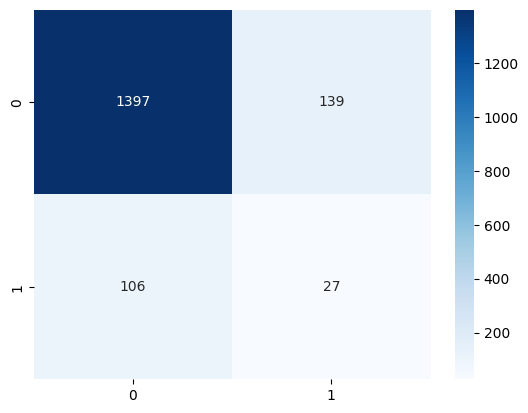

In [ ]:
cf(gnb)

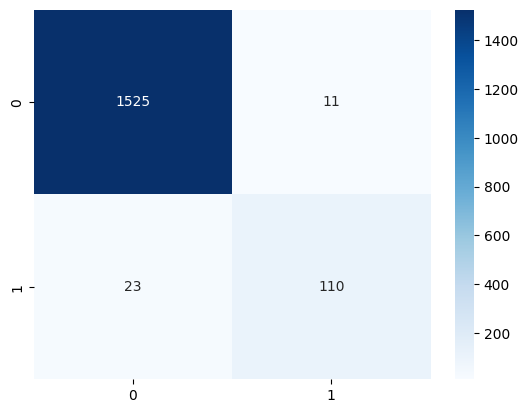

In [ ]:
cf(tree)

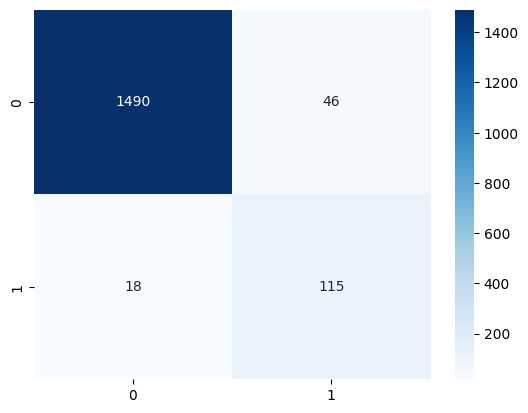

In [ ]:
cf(knn)

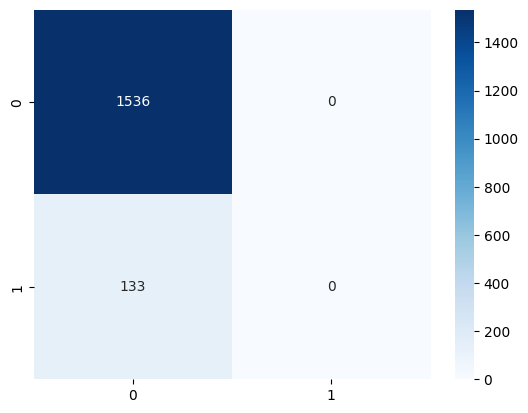

In [ ]:
cf(svm)

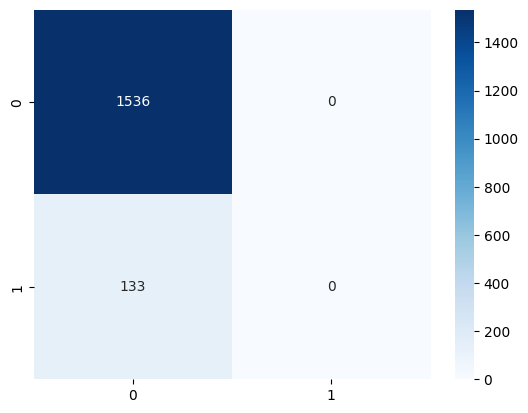

In [ ]:
cf(log)

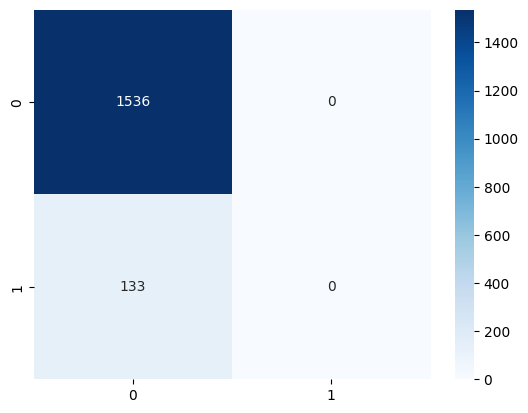

In [ ]:
cf(rf)

In [ ]:
data_list=[]
for model in models:
  y_pred = model.predict(X_test)
  cf_try = confusion_matrix(y_test,y_pred)
  tp = cf_try[0][0]
  fp = cf_try[1][0]
  fn = cf_try[1][1]
  tn = cf_try[0][1]
  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)
  accuracy = np.sum(tp) / np.sum(cf_try)
  data = [tp,fp,fn,tn,tpr,fpr,accuracy]
  data_list.append(data)

In [ ]:
df = pd.DataFrame(data_list,columns=["True Positive","False Positive","False Negative","True Negative","True Positive Rate","False Positive Rate","Accuracy"],
                  index=["Gausian Naive Bayes","Decision Tree","K-NN","Linear SVM","Logisitic Regression","Random Forest Classifier"])
df

,True Positive,False Positive,False Negative,True Negative,True Positive Rate,False Positive Rate,Accuracy
Gausian Naive Bayes,1397,106,27,139,0.981039,0.432653,0.837028
Decision Tree,1525,23,110,11,0.932722,0.676471,0.913721
K-NN,1490,18,115,46,0.928349,0.281250,0.892750
Linear SVM,1536,133,0,0,1.000000,1.000000,0.920312
Logisitic Regression,1536,133,0,0,1.000000,1.000000,0.920312
Random Forest Classifier,1536,133,0,0,1.000000,1.000000,0.920312


In [ ]:
for model in models:
    scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv) 
    print('Min Accuracy of {}: %.3f'.format(str(model)) % (scores.min()))
    print('Max Accuracy of {}: %.3f'.format(str(model)) % (scores.max()))
    print('Mean Accuracy of {}: %.3f'.format(str(model)) % (np.mean(scores)))

Min Accuracy of GaussianNB(): 0.778
Max Accuracy of GaussianNB(): 0.867
Mean Accuracy of GaussianNB(): 0.811
Min Accuracy of DecisionTreeClassifier(random_state=39): 0.964
Max Accuracy of DecisionTreeClassifier(random_state=39): 0.994
Mean Accuracy of DecisionTreeClassifier(random_state=39): 0.975
Min Accuracy of KNeighborsClassifier(n_neighbors=3): 0.940
Max Accuracy of KNeighborsClassifier(n_neighbors=3): 0.988
Mean Accuracy of KNeighborsClassifier(n_neighbors=3): 0.961
Min Accuracy of LogisticRegression(max_iter=10000, random_state=39): 0.916
Max Accuracy of LogisticRegression(max_iter=10000, random_state=39): 0.922
Mean Accuracy of LogisticRegression(max_iter=10000, random_state=39): 0.920
Min Accuracy of RandomForestClassifier(max_depth=2, random_state=39): 0.916
Max Accuracy of RandomForestClassifier(max_depth=2, random_state=39): 0.922
Mean Accuracy of RandomForestClassifier(max_depth=2, random_state=39): 0.920
Min Accuracy of LinearSVC(dual=False, random_state=39): 0.916
Max Ac